In [1]:
# Collection of data that(image) 

In [2]:
# Data cleaning in image 

In [3]:
# feature engeneering

In [4]:
# for face detection we take image of two eyes clear  and visible
# 80 % image are cleaned by python code itself and 10 % we have to clean manually like if  there are two person in a picture 
# then we have to delete one picture manually 

In [5]:
# 1.Raw Images 
# 2.Cropped faces with 2c eyes using haar cascade 
# 3.Manual data cleaning
# 4.Wavelet transformed images

In [4]:
import pandas as pd
import numpy as np
import cv2 as cv
import seaborn as sn
import matplotlib
import pywt
import joblib
import json
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [6]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [7]:
# pip install opencv-python

In [8]:
img  = cv.imread('D:/cars/Image classifier/dataimage/lang.jpg')
img.shape # x ,y , rgb value

(647, 796, 3)

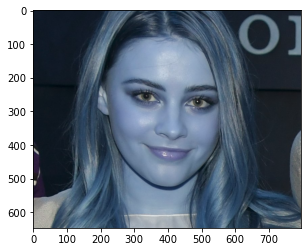

In [9]:
plt.imshow(img)

In [10]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [11]:
gray.shape

(647, 796)

In [12]:
gray #?

array([[ 29,  29,  29, ...,  39,  39,  39],
       [ 28,  29,  29, ...,  39,  39,  39],
       [ 28,  28,  29, ...,  39,  39,  39],
       ...,
       [178, 169, 167, ..., 138, 135, 131],
       [174, 173, 169, ..., 136, 140, 143],
       [165, 171, 168, ..., 135, 145, 153]], dtype=uint8)

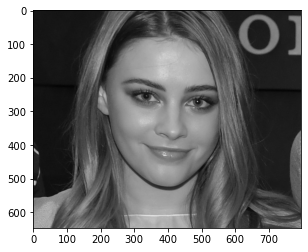

In [13]:
plt.imshow(gray, cmap='gray')

In [14]:
# we are going to identify face and eyes
# using haar cascade

In [15]:
face_cascade  = cv.CascadeClassifier('C:/Users/lenovo/anaconda3/envs/myenv/Library/etc/haarcascades/haarcascade_frontalface_default.xml')

In [16]:
face_cascade

< cv2.CascadeClassifier 0000015A50664DD0>

In [17]:
eye_cascade = cv.CascadeClassifier('C:/Users/lenovo/anaconda3/envs/myenv/Library/etc/haarcascades/haarcascade_eye.xml')

In [18]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [19]:
faces #x ,y, width, height

array([[197, 105, 425, 425]])

In [20]:
#face start from(197,105) and widht 425 along x and hight 425 along y

In [21]:
(x,y,w,h) = faces[0] #first face
x,y,w,h

(197, 105, 425, 425)

In [22]:
face_img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) # to mark face by red rectangle 255,0,0=r,g,b

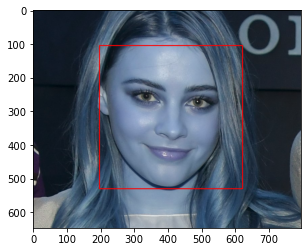

In [23]:
plt.imshow(face_img)

In [24]:
eye_cascade = cv.CascadeClassifier('C:/Users/lenovo/anaconda3/envs/myenv/Library/etc/haarcascades/haarcascade_eye.xml')

In [25]:
eye_cascade

< cv2.CascadeClassifier 0000015A512C0AB0>

In [26]:
# roi_gray = gray[y:y+h, x:x+w] #?

In [27]:
# roi_color = face_img[y:y+h, x:x+w] #?

In [28]:
eyes = eye_cascade.detectMultiScale(gray, 1.3, 5) #detecting face in the grayscale image

In [29]:
# eyes = eye_cascade.detectMultiScale(roi_gray)

In [30]:
eyes

array([[289, 213,  88,  88],
       [447, 229,  91,  91]])

In [31]:
for row in eyes:
    print(row)

[289 213  88  88]
[447 229  91  91]


In [32]:
eyes

array([[289, 213,  88,  88],
       [447, 229,  91,  91]])

In [33]:
# (ex,ey,ew,eh) = eyes[0] #first face
# ex,ey,ew,eh

In [34]:
# (ex,ey,ew,eh) = eyes[1] #first face
# ex,ey,ew,eh

In [35]:
for (ex,ey,ew,eh) in eyes:
    print(ex,ey,ew,eh)
    eye_img = cv.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)    


289 213 88 88
447 229 91 91


In [36]:
# roi_gray = gray[y:y+h, x:x+w]

In [37]:
# roi_color = face_img[y:y+h, x:x+w]    #take the roi of the face (region of interest) 

In [38]:
# eye_img = cv.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

In [39]:
# eye_img = cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

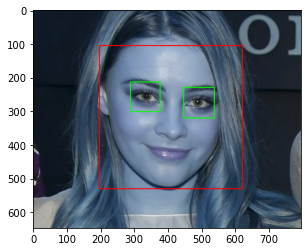

In [40]:
plt.imshow(eye_img)

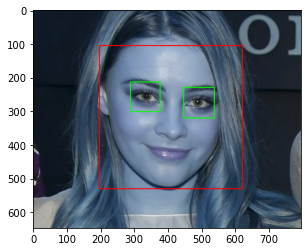

In [41]:
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

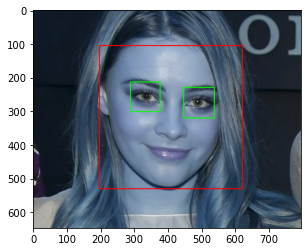

In [42]:
plt.imshow(eye_img, cmap='gray')

[[ 90 106  92  92]
 [248 122  94  94]
 [151 282  94  94]]
90 106 92 92
248 122 94 94
151 282 94 94


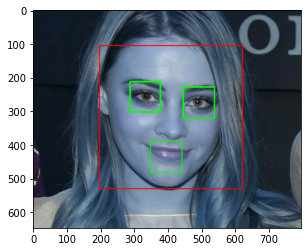

In [43]:
# """
cv.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) # to mark face by red rectangle 255,0,0=r,g,b
    roi_gray = gray[y:y+h,x:x+w] #?
#     print(roi_gray)
    roi_color = face_img[y:y+h,x:x+w] #?
#     print(roi_color)
    eyes = eye_cascade.detectMultiScale(roi_gray)  #detect the eyes
   
    print(eyes)
    for (ex,ey,ew,eh) in eyes:
        print(ex,ey,ew,eh)
        eye_img = cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)  #draw rectangle for each eye
        
    
    
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()
    
# """

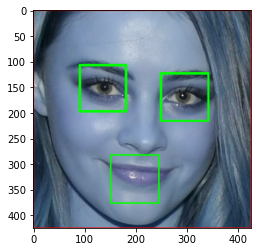

In [44]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [78]:
######

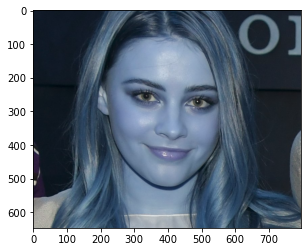

In [7]:
original_image = cv.imread('D:/cars/Image classifier/dataimage/lang.jpg')
plt.imshow(original_image)

In [8]:
face_cascade  = cv.CascadeClassifier('C:/Users/lenovo/anaconda3/envs/myenv/Library/etc/haarcascades/haarcascade_frontalface_default.xml')

In [9]:
eye_cascade = cv.CascadeClassifier('C:/Users/lenovo/anaconda3/envs/myenv/Library/etc/haarcascades/haarcascade_eye.xml')

In [10]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv.imread(image_path)
#     print(img)

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #?
#     print(gray)
   
    faces = face_cascade.detectMultiScale(gray,1.3,5) #?
#     print(faces)
   
    
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w] #??????????
        roi_color = img[y:y+h, x:x+w] #??????????
        eyes = eye_cascade.detectMultiScale(roi_gray)
#         plt.imshow(eyes)
        if len(eyes) >=2: #?
            return roi_color

[[ 29  29  29 ...  39  39  39]
 [ 28  29  29 ...  39  39  39]
 [ 28  28  29 ...  39  39  39]
 ...
 [178 169 167 ... 138 135 131]
 [174 173 169 ... 136 140 143]
 [165 171 168 ... 135 145 153]]


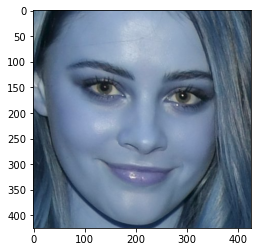

In [11]:
cropped_image = get_cropped_image_if_2_eyes('D:/cars/Image classifier/dataimage/lang.jpg')
plt.imshow(cropped_image)

In [12]:
# %matplotlib inline
# plt.imshow(roi_color, cmap='gray')

In [13]:
path_to_data = "D:/cars/Image classifier/"
# path_to_data = "D:\cars\Image classifier\"

In [14]:
path_to_cr_data = "D:/cars/Image classifier/cropped/"

In [15]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path) ##??

In [16]:
img_dirs

['D:/cars/Image classifier/dataimage', 'D:/cars/Image classifier/kate']

In [17]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)
#to create a folder or directory #??

In [18]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir): ##?
#         print(entry.path)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
#         print(roi_color)
        if roi_color is not None: #??
            print('sx')
            cropped_folder = path_to_cr_data + celebrity_name
            print(cropped_folder)
            if not os.path.exists(cropped_folder): #??
                print('gh')
                os.makedirs(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png" ##??
            cropped_file_path = cropped_folder + "/" + cropped_file_name #??
            
            cv.imwrite(cropped_file_path, roi_color) #??
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
            
            
            
            

dataimage
[[ 29  29  29 ...  39  39  39]
 [ 28  29  29 ...  39  39  39]
 [ 28  28  29 ...  39  39  39]
 ...
 [178 169 167 ... 138 135 131]
 [174 173 169 ... 136 140 143]
 [165 171 168 ... 135 145 153]]
sx
D:/cars/Image classifier/cropped/dataimage
gh
Generating cropped images in folder:  D:/cars/Image classifier/cropped/dataimage
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
sx
D:/cars/Image classifier/cropped/dataimage
[[244 245 245 ... 235 237 237]
 [244 244 245 ... 235 238 238]
 [244 244 244 ... 235 239 239]
 ...
 [213 215 217 ... 159 158 158]
 [213 215 217 ... 159 158 158]
 [213 215 217 ... 159 158 158]]
[[180 180 181 ... 208 208 208]
 [171 171 172 ... 196 196 196]
 [160 161 161 ... 185 185 185]
 ...
 [127 127 129 ... 137 137 137]
 [129 129 131 ... 140 141 140]
 [133 133 135 ... 143 144 144]]
sx
D:/cars/Image classifier/cropped/dataimage


In [19]:
#dictionary like
# {
#     'dataimage':[
#         '..../cropped/dataimage/dataimage1.png',
#         '..../cropped/dataimage/dataimage2.png'
#     ],
#     'kate':[
#         '..../cropped/kate/kate1.png',
#         '..../cropped/kate/kate1.png'
#     ]
# }

In [20]:
# feature engeneering wavelet function

In [21]:
def w2d(img, mode='haar', level=1): ##??????
    imArray = img
    #Datatype Conversations
    #convert to graycycle
    imArray = cv.cvtColor(imArray,cv.COLOR_RGB2GRAY)
    #COnvert to float
    imArray = np.float32(imArray)
    imArray /= 225;
    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    #process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *=0;
    
    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H *=255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

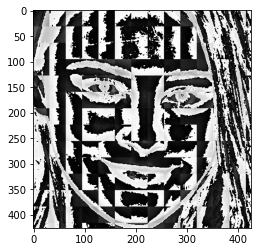

In [22]:
#wavelet transformation
im_har = w2d(cropped_image,'db1', 5)
plt.imshow(im_har, cmap='gray')

In [23]:
celebrity_file_names_dict

{'dataimage': ['D:/cars/Image classifier/cropped/dataimage/dataimage1.png',
  'D:/cars/Image classifier/cropped/dataimage/dataimage2.png',
  'D:/cars/Image classifier/cropped/dataimage/dataimage3.png',
  'D:/cars/Image classifier/cropped/dataimage/dataimage4.png',
  'D:/cars/Image classifier/cropped/dataimage/dataimage5.png',
  'D:/cars/Image classifier/cropped/dataimage/dataimage6.png',
  'D:/cars/Image classifier/cropped/dataimage/dataimage7.png',
  'D:/cars/Image classifier/cropped/dataimage/dataimage8.png',
  'D:/cars/Image classifier/cropped/dataimage/dataimage9.png',
  'D:/cars/Image classifier/cropped/dataimage/dataimage10.png'],
 'kate': ['D:/cars/Image classifier/cropped/kate/kate1.png',
  'D:/cars/Image classifier/cropped/kate/kate2.png',
  'D:/cars/Image classifier/cropped/kate/kate3.png',
  'D:/cars/Image classifier/cropped/kate/kate4.png',
  'D:/cars/Image classifier/cropped/kate/kate5.png',
  'D:/cars/Image classifier/cropped/kate/kate6.png',
  'D:/cars/Image classifier/c

In [24]:
class_dict={}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'dataimage': 0, 'kate': 1}

In [25]:
x = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv.resize(img, (32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [26]:
len(x) # dataimge=5, kate=4 =9

18

In [27]:
len(x[0])

4096

In [28]:
32*32*3 + 32*32 #raw and rgb

4096

In [29]:
x[0] #machine learning model only understand number

array([[103],
       [130],
       [151],
       ...,
       [  0],
       [  2],
       [  4]], dtype=uint8)

In [30]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(18, 4096)

In [31]:
x[0]

array([103., 130., 151., ...,   0.,   2.,   4.])

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)
pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel = 'rbf', C=10))]) #??
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [33]:
pipe.score(x_test, y_test)

0.6

In [34]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
model_params = {
    'svm':{
        'model':svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000], #double underscore
            'svc__kernel': ['rbf','linear'] #double underscore
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear', multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10] #double underscore and cap C
        }
    }
}

In [47]:
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'],cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
    
df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df
    



,model,best_score,best_params
0,svm,0.733333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.666667,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.800000,{'logisticregression__C': 1}


In [48]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [49]:
best_estimators['svm'].score(x_test,y_test)

0.6

In [50]:
best_estimators['random_forest'].score(x_test,y_test)

0.6

In [51]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.6

In [52]:
best_clf = best_estimators['svm']

In [53]:
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[1, 2],
       [0, 2]], dtype=int64)

Text(69.0, 0.5, 'Truth')

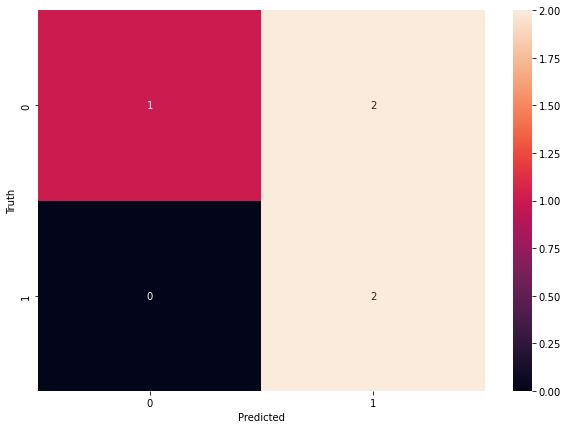

In [54]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
class_dict

{'dataimage': 0, 'kate': 1}

In [56]:
# 18:12 part5

In [57]:
#save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [58]:
#saved class dictionary
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict ))

In [ ]:
part6